In [1]:
import sklearn.svm as svm
from os import listdir
import os
from os.path import isfile, join
from bs4 import BeautifulSoup as bs
import urllib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os
import cv2
import numpy as np
from sklearn import model_selection, preprocessing, neighbors
import collections

img_dimension = 100

['/Users/rohitneppalli/Downloads/Flags/AA-flag.png', '/Users/rohitneppalli/Downloads/Flags/AC-flag.png', '/Users/rohitneppalli/Downloads/Flags/AE-flag.png', '/Users/rohitneppalli/Downloads/Flags/AF-flag.png', '/Users/rohitneppalli/Downloads/Flags/AG-flag.png', '/Users/rohitneppalli/Downloads/Flags/AJ-flag.png', '/Users/rohitneppalli/Downloads/Flags/AL-flag.png', '/Users/rohitneppalli/Downloads/Flags/AM-flag.png', '/Users/rohitneppalli/Downloads/Flags/AN-flag.png', '/Users/rohitneppalli/Downloads/Flags/AO-flag.png', '/Users/rohitneppalli/Downloads/Flags/AQ-flag.png', '/Users/rohitneppalli/Downloads/Flags/AR-flag.png', '/Users/rohitneppalli/Downloads/Flags/AS-flag.png', '/Users/rohitneppalli/Downloads/Flags/AT-flag.png', '/Users/rohitneppalli/Downloads/Flags/AU-flag.png', '/Users/rohitneppalli/Downloads/Flags/AV-flag.png', '/Users/rohitneppalli/Downloads/Flags/AX-flag.png', '/Users/rohitneppalli/Downloads/Flags/BA-flag.png', '/Users/rohitneppalli/Downloads/Flags/BB-flag.png', '/Users/roh

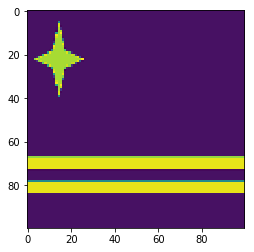

(100, 100)
10000


In [2]:
mypath = "/Users/rohitneppalli/Downloads/Flags"
my_dir = sorted(listdir(mypath))
onlyfiles = sorted([join(mypath,f) for f in my_dir if isfile(join(mypath, f)) and ".png" in str(f)])
print(onlyfiles)
images = [np.array(cv2.resize(mpimg.imread(join(mypath, file), 0), (img_dimension, img_dimension)))[
:, :, 0] for file in onlyfiles]  # screws up image color, but down to 2 dimensions
plt.imshow(images[0])
plt.show()
print(np.array(images[0]).shape)
print(np.array(images[0]).size)

In [3]:
html = bs(urllib.request.urlopen("https://www.cia.gov/library/publications/the-world-factbook/docs/flagsoftheworld.html"), "lxml")

div_names = [div.getText() for div in html.find_all("div", attrs={"class": "flag-description"})]
flags = [div.find("img")["src"][-11:-9] for div in html.find_all("div", attrs={"class": "flag-image"})]
map = {flags[i]: div_names[i] for i in range(len(flags))}
map = collections.OrderedDict(sorted(map.items()))
print(map)

OrderedDict([('AA', 'Aruba'), ('AC', 'Antigua and Barbuda'), ('AE', 'United Arab Emirates'), ('AF', 'Afghanistan'), ('AG', 'Algeria'), ('AJ', 'Azerbaijan'), ('AL', 'Albania'), ('AM', 'Armenia'), ('AN', 'Andorra'), ('AO', 'Angola'), ('AQ', 'American Samoa'), ('AR', 'Argentina'), ('AS', 'Australia'), ('AT', 'Ashmore and Cartier Islands'), ('AU', 'Austria'), ('AV', 'Anguilla'), ('AX', 'Akrotiri'), ('BA', 'Bahrain'), ('BB', 'Barbados'), ('BC', 'Botswana'), ('BD', 'Bermuda'), ('BE', 'Belgium'), ('BF', 'Bahamas, The'), ('BG', 'Bangladesh'), ('BH', 'Belize'), ('BK', 'Bosnia and Herzegovina'), ('BL', 'Bolivia'), ('BM', 'Burma'), ('BN', 'Benin'), ('BO', 'Belarus'), ('BP', 'Solomon Islands'), ('BQ', 'Navassa Island'), ('BR', 'Brazil'), ('BT', 'Bhutan'), ('BU', 'Bulgaria'), ('BV', 'Bouvet Island'), ('BX', 'Brunei'), ('BY', 'Burundi'), ('CA', 'Canada'), ('CB', 'Cambodia'), ('CD', 'Chad'), ('CE', 'Sri Lanka'), ('CF', 'Congo, Republic of the'), ('CG', 'Congo, Democratic Republic of the'), ('CH', 'Ch

In [4]:
df = pd.DataFrame({"Country": [val for key, val in map.items()]})

for i in range(img_dimension**2):
    pixels = [images[x][int(i/img_dimension)][i%img_dimension] for x in range(len(images))]
    pixels = preprocessing.scale(pixels)
    df["Pixel " + str(i + 1)] = pixels
print(df.head())

                Country   Pixel 1   Pixel 2   Pixel 3   Pixel 4   Pixel 5  \
0                 Aruba -0.871815 -0.833430 -0.830503 -0.847502 -0.837804   
1   Antigua and Barbuda  0.166520 -1.745098 -1.731087 -1.751298 -1.739147   
2  United Arab Emirates  0.492509  0.504472  0.491134  0.478847  0.484946   
3           Afghanistan -1.801486 -1.745098 -1.731087 -1.751298 -1.739147   
4               Algeria -0.714857 -0.857110 -0.853894 -0.870977 -0.861216   

    Pixel 6   Pixel 7   Pixel 8   Pixel 9     ...       Pixel 9991  \
0 -0.808813 -0.787923 -0.681034 -0.697826     ...        -0.841342   
1 -1.706871 -1.686793 -1.573472 -1.593489     ...         0.518611   
2  0.509118  0.531197  0.628647  0.616588     ...        -1.768035   
3 -1.706871 -1.686793 -1.573472 -1.593489     ...        -1.563441   
4 -0.832139 -0.811271 -0.704214 -0.721090     ...         1.048151   

   Pixel 9992  Pixel 9993  Pixel 9994  Pixel 9995  Pixel 9996  Pixel 9997  \
0   -0.841843   -0.841607   -0.847989  

In [6]:
model = svm.SVC(gamma=0.001, C=1000)
x = df[df.columns.values[1:]]
y = df.Country
nearest_neighbor = neighbors.KNeighborsClassifier()
nearest_neighbor.fit(x, y)
model.fit(x, y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
img = "/Users/rohitneppalli/Downloads/eg.png"
img_array = np.array(cv2.resize(mpimg.imread(img, 0), (img_dimension, img_dimension)))[:, :, 0]
pixels = [img_array[int(i/img_dimension)][i % img_dimension] for i in range(img_dimension**2)]
pixels = np.array(preprocessing.scale(pixels))

print(model.predict(pixels.reshape(-1, img_dimension**2)))
print(nearest_neighbor.predict(pixels.reshape(-1, img_dimension**2)))

['Netherlands']
['Bolivia']
